# Data Science Visualization
*Based on work by Nassar Huda*

### Data visualization: generating nice looking plots in Julia is straight forward
We have already covered basic plotting in Julia. In what's next, we will see some of the tools that Julia plotting provides to produce high quality figures for your data.

## Part 1: plot math (specifically latex equations) in our plots

In [1]:
using Pkg
#Pkg.add("LaTeXStrings")
#Pkg.add("PyPlot")
using LaTeXStrings
using Plots
pyplot()
x = 1:0.2:4

1.0:0.2:4.0

Let's declare some variables that store the functions we want to plot written in LaTex

In [2]:
x2 = L"x^2"
logx = L"log(x)"
sqrtx = L"\sqrt{x}"

L"$\sqrt{x}$"

Create three functions and plot them all!

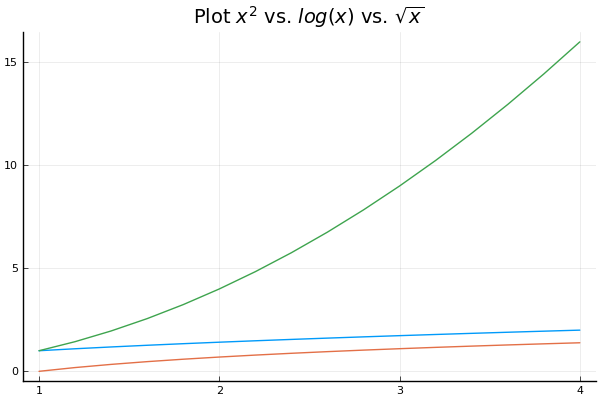

In [3]:
y1 = sqrt.(x)
y2 = log.(x)
y3 = x.^2

f1 = plot(x,y1,legend = false)
plot!(f1, x,y2) # "plot!" means "plot on the same canvas we just plotted on"
plot!(f1, x,y3)
title!("Plot $x2 vs. $logx vs. $sqrtx")

Now we can annotate each of these curves using either text, or latex strings

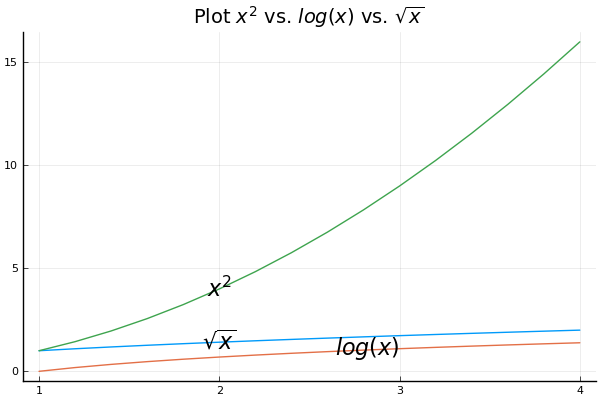

In [4]:
annotate!(f1,[(x[6],y1[6],text(sqrtx,16,:center)),
          (x[11],y2[11],text(logx,:right,16)),
          (x[6],y3[6],text(x2,16))])

Yay! Now you can convince a little child that x^2 grows much faster than sqrt(x)

## Part 2: Stat Plots. 

2D histograms are really easy!

In [11]:
?histogram2d

search: histogram2d histogram2d! histogram! histogram



```
histogram2d(x,y)
histogram2d!(x,y)
```

Plot a two-dimensional histogram.

# Arguments

  * `bins`: Number of bins (if an `Integer`) or bin edges (if an `AbtractVector`)
  * `weights`: Vector of weights for the values in `x`. Each entry of x contributes            its weight to the height of its bin.

# Example

```julia-repl
julia> histogram2d(randn(10_000),randn(10_000))
```


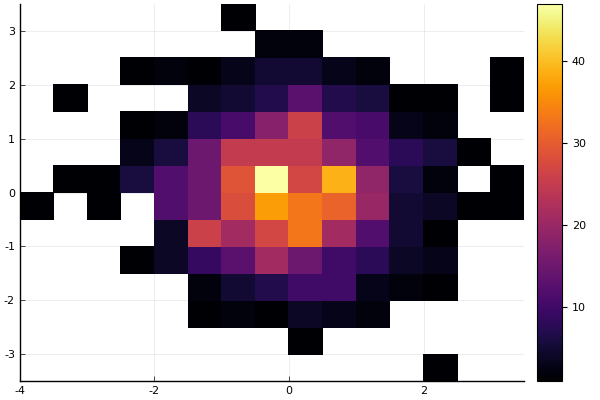

In [17]:
n = 1000
set1 = randn(n)
set2 = randn(n)
histogram2d(set1,set2,nbins=20,colorbar=true)

**Let's download houses dataset and learn about about it!**

In [5]:
using DataFrames
using CSV
download("http://samplecsvs.s3.amazonaws.com/Sacramentorealestatetransactions.csv","houses.csv")
houses = CSV.read("houses.csv")
filter_houses = houses[houses[!, :sq__ft].>0,:]
x = filter_houses[!, :sq__ft]
y = filter_houses[!, :price]

814-element Array{Int64,1}:
  59222
  68212
  68880
  69307
  81900
  89921
  90895
  91002
  94905
  98937
 100309
 106250
 106852
      ⋮
 224252
 225000
 228000
 229027
 229500
 230000
 230000
 232425
 234000
 235000
 235301
 235738

In [15]:
houses

,street,city,zip,state,beds,baths,sq__ft
,String,String,Int64,String,Int64,Int64,Int64
1,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836
2,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167
3,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796
4,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852
5,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797
6,5828 PEPPERMILL CT,SACRAMENTO,95841,CA,3,1,1122
7,6048 OGDEN NASH WAY,SACRAMENTO,95842,CA,3,2,1104
8,2561 19TH AVE,SACRAMENTO,95820,CA,3,1,1177
9,11150 TRINITY RIVER DR Unit 114,RANCHO CORDOVA,95670,CA,2,2,941


In [16]:
houses[houses[!, :sq__ft].>0,:]

,street,city,zip,state,beds,baths,sq__ft
,String,String,Int64,String,Int64,Int64,Int64
1,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836
2,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167
3,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796
4,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852
5,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797
6,5828 PEPPERMILL CT,SACRAMENTO,95841,CA,3,1,1122
7,6048 OGDEN NASH WAY,SACRAMENTO,95842,CA,3,2,1104
8,2561 19TH AVE,SACRAMENTO,95820,CA,3,1,1177
9,11150 TRINITY RIVER DR Unit 114,RANCHO CORDOVA,95670,CA,2,2,941


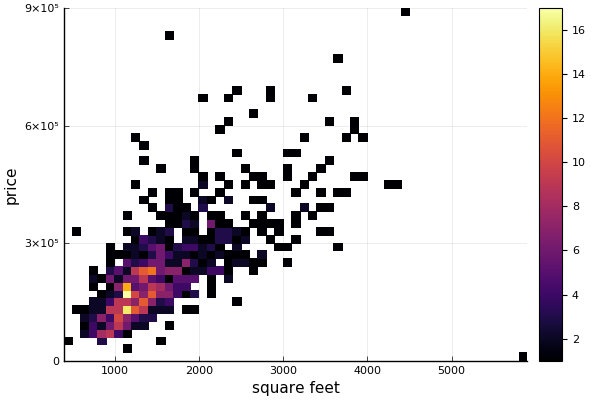

In [18]:
gh = histogram2d(x,y,nbins=50,colorbar=true)
xaxis!(gh,"square feet")
yaxis!(gh,"price")

Interesting! 

Most houses sold are in the range 1000-1500 and they cost approximately 150,000 dollars

*Let's see more stats plots.*

We can convince ourselves that random distrubutions are indeed very similar.

Let's do that through **box plots** and **violin plots**.

In [20]:
Pkg.add("StatsPlots")
using StatsPlots

   Updating registry at `C:\Users\Victor\.julia\registries\General`
   Updating git-repo `https://github.com/JuliaRegistries/General.git`


Fetching: [========================================>]  99.9 %0.0 %8 % [==============>                          ]  32.9 % [===================>                     ]  46.7 %]  63.1 %87.1 %96.5 %

  Resolving package versions...
  Installed OpenBLAS_jll ─────────── v0.3.9+5
  Installed PositiveFactorizations ─ v0.2.3
  Installed JpegTurbo_jll ────────── v2.0.1+1
  Installed StatsPlots ───────────── v0.14.6
  Installed DiffRules ────────────── v1.0.1
  Installed LineSearches ─────────── v7.0.1
  Installed ForwardDiff ──────────── v0.10.12
  Installed Optim ────────────────── v0.22.0
  Installed DiffResults ──────────── v1.0.2
  Installed CommonSubexpressions ─── v0.3.0
  Installed FiniteDiff ───────────── v2.3.2
  Installed KernelDensity ────────── v0.5.1
  Installed MultivariateStats ────── v0.7.0
  Installed NLSolversBase ────────── v7.6.1
  Installed DataValues ───────────── v0.4.13
  Installed Clustering ───────────── v0.14.1
  Installed NearestNeighbors ─────── v0.4.4
  Installed ArrayInterface ───────── v2.9.0
  Installed TableOperations ──────── v0.2.1
   Updating `C:\Users\Victor\.julia\environments\v1.4\Project.toml`
  [f3b207a7] + StatsPlots v0.14.6
   Updating `C:\User

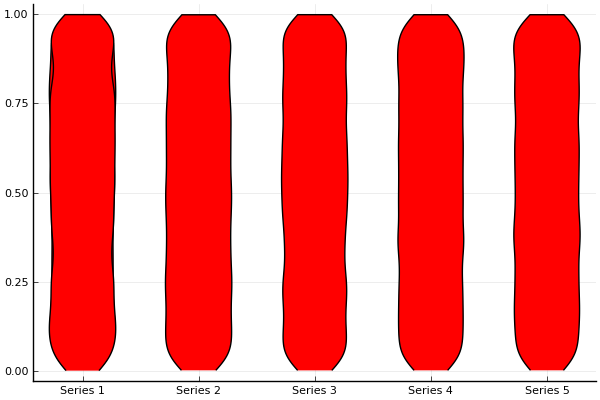

In [21]:
y = rand(10000,6) # generate 6 random samples of size 1000 each
f2 = violin(["Series 1" "Series 2" "Series 3" "Series 4" "Series 5"], y, leg=false, color=:red)

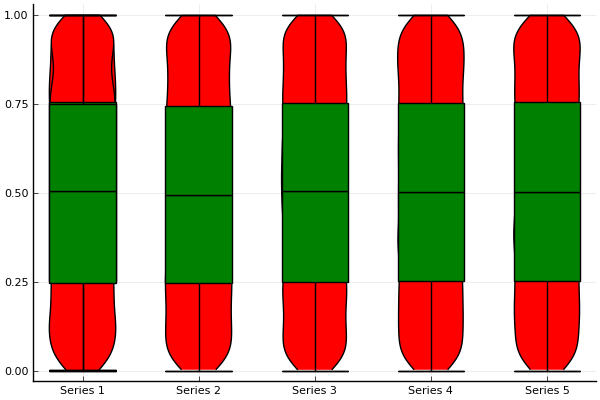

In [22]:
boxplot!(["Series 1" "Series 2" "Series 3" "Series 4" "Series 5"],y,leg=false,color=:green)

These plots look almost identical, so we do have the same distribution indeed.

Let's study the price distributions in different cities in the houses dataset.

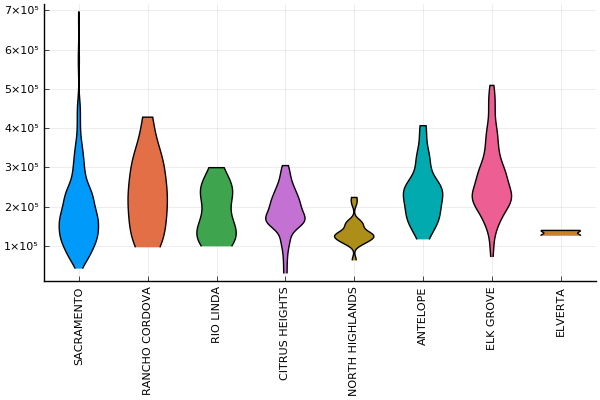

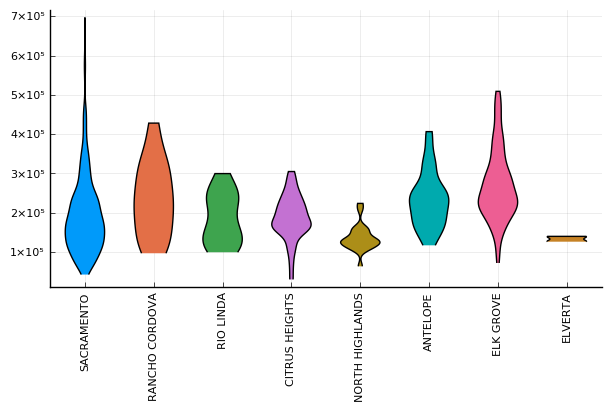

In [23]:
some_cities = ["SACRAMENTO","RANCHO CORDOVA","RIO LINDA","CITRUS HEIGHTS","NORTH HIGHLANDS","ANTELOPE","ELK GROVE","ELVERTA" ] # try picking pther cities!

fh = plot(xrotation=90)
for ucity in some_cities
    subs = filter_houses[filter_houses[!, :city].==ucity,:]
    city_prices = subs[!, :price]
    violin!(fh,[ucity],city_prices,leg=false)
end
display(fh)

## Part 3: Subplots are very easy!

You can create your own layout as follows.

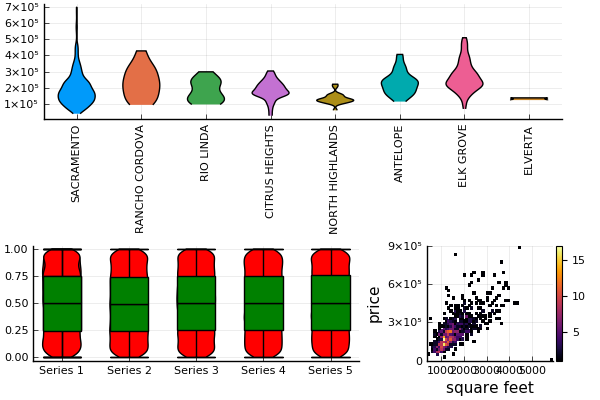

In [27]:
mylayout = @layout([a{0.5h};[b{0.7w} c]])
plot(fh,f2,gh,layout=mylayout,legend=false)

# this layout:
# 1 
# 2 3

## Part 4: Bonus plot, XKCD kind of plots with PyPlot

Let's load `PyPlot` and create some data.

In [28]:
using PyPlot
x = 1:100;
y = vcat(ones(Int,20),1:10,10*ones(70));

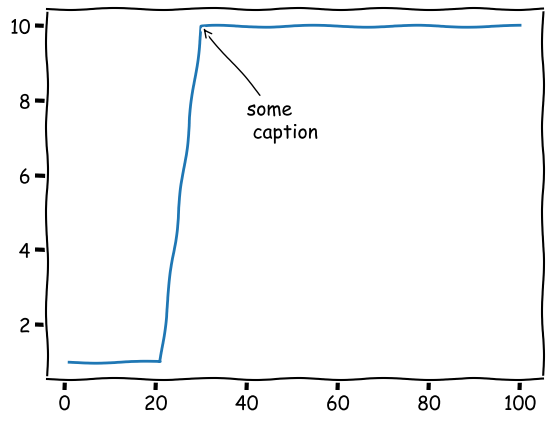

PyObject Text(40, 7, 'some \n caption')

In [29]:
xkcd()
fig = figure()
ax = PyPlot.axes()
p = PyPlot.plot(x,y)
annotate("some \n caption",xy=[30;10],arrowprops=Dict("arrowstyle"=>"->"),xytext=[40;7])

Modify the plot parameters:

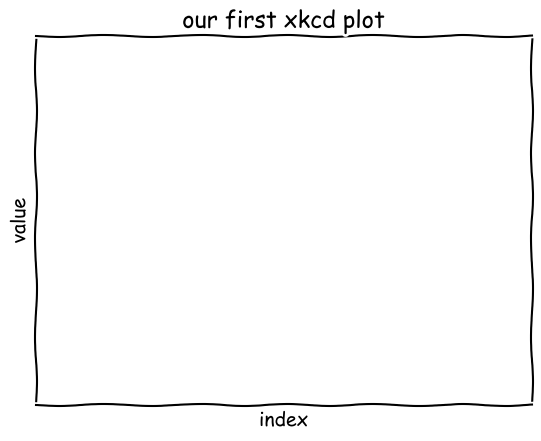

In [30]:
xticks([])
yticks([])
xlabel("index")
ylabel("value")
title("our first xkcd plot")

ax.spines["top"].set_color("none") 
ax.spines["right"].set_color("none") 
ax.spines["left"].set_color("none") 
ax.spines["bottom"].set_color("none") 

fig.canvas.draw()

And finally, display the figure!

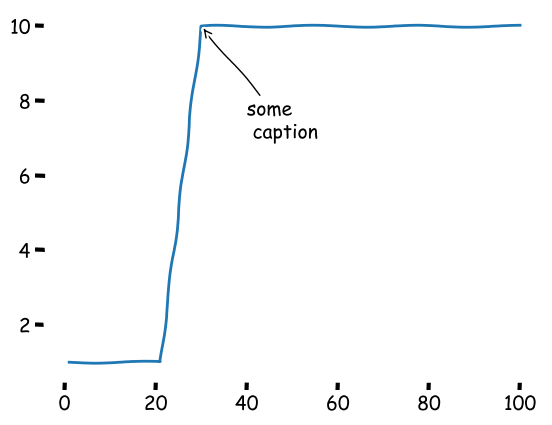

In [31]:
display(fig)